## Query 0: Preparing the Graph

We start by loading the graph data from CSV files, create an undirected, unweighted graph, and focus on its largest connected component.

The number of nodes in the graph is DiGraph with 82 nodes and 162 edges.


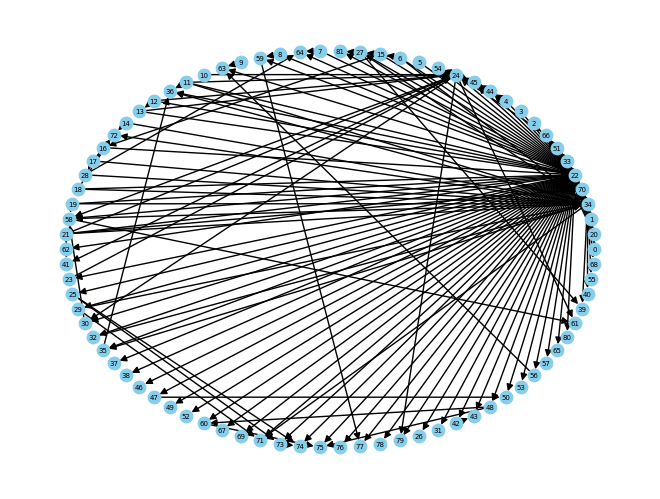

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target', create_using=nx.DiGraph())

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is ' + str(G) + '.')

# Circular plot
nx.draw_circular(G, with_labels="True",node_color='skyblue', edge_color='black', node_size=80, font_size=5, arrows=True)



## Query 1: Computing the pagerank
1. **Function**: The function `compute_pagerank` computes the PageRank of nodes in a given graph `G`. It iteratively adjusts the rank of each node based on the structure of the graph.

2. **Parameters**:
   - `G`: The graph for which PageRanks are to be calculated.
   - `num_iterations=100`: The maximum number of iterations to perform.
   - `d=0.85`: The damping factor, representing the probability that a user will continue browsing to another page.
   - `convergence_threshold=1e-6`: The threshold for convergence, determining when to stop iterating.

3. **Initial Setup**:
   - Initializes `page_rank` to give each node an equal rank, summing to 1.

4. **Iteration Process**:
   - Iterates up to `num_iterations` times, recalculating ranks in each iteration.
   - Calculates the `dangling_sum`, which accounts for nodes with no out-links.
   - Updates the rank of each node (`new_page_rank`) based on the rank of its predecessors and the damping factor.

5. **Convergence Check**:
   - Checks if the sum of absolute differences between new and old ranks (`delta`) is less than the `convergence_threshold`.
   - If `delta` is below the threshold, the process terminates early, indicating convergence.

6. **Final Output**:
   - The function returns the final PageRank values as a dictionary, where keys are node identifiers and values are their corresponding PageRank scores.

7. **Demonstration**:
   - After computing the PageRanks, the code prints out the PageRank for each node in the graph.



In [2]:
def compute_pagerank(G, num_iterations=100, d=0.85, convergence_threshold=1e-6):
    N = G.number_of_nodes()
    page_rank = dict.fromkeys(G, 1.0 / N)  
    for i in range(num_iterations):
        new_page_rank = dict.fromkeys(G, 0)
        dangling_sum = 0 

        for node in G:
            if G.out_degree(node) == 0:
                dangling_sum += page_rank[node]

        for node in G:
            for neighbor in G.predecessors(node):
                if G.out_degree(neighbor) > 0:
                    new_page_rank[node] += d * page_rank[neighbor] / G.out_degree(neighbor)
            new_page_rank[node] += (1 - d) / N  
            new_page_rank[node] += d * dangling_sum / N 

        delta = sum(abs(new_page_rank[node] - page_rank[node]) for node in G)
        if delta < convergence_threshold:
            break

        page_rank = new_page_rank

    return page_rank

page_ranks = compute_pagerank(G)

# Print the PageRank values
for node, rank in page_ranks.items():
    print(f"Node {node}: PageRank {rank}")

Node 0: PageRank 0.006969639945000045
Node 20: PageRank 0.010030464647849199
Node 1: PageRank 0.00894436486837864
Node 34: PageRank 0.04609611585363904
Node 70: PageRank 0.014750470761175997
Node 22: PageRank 0.060072662688070946
Node 33: PageRank 0.010497962245179421
Node 51: PageRank 0.01720351163722749
Node 66: PageRank 0.01660934997796909
Node 2: PageRank 0.006969639945000045
Node 3: PageRank 0.006969639945000045
Node 4: PageRank 0.006969639945000045
Node 44: PageRank 0.012021956957926632
Node 45: PageRank 0.017131308105307344
Node 24: PageRank 0.03013661624475734
Node 54: PageRank 0.031692915744619785
Node 5: PageRank 0.006969639945000045
Node 6: PageRank 0.006969639945000045
Node 15: PageRank 0.008154474899027202
Node 27: PageRank 0.009175715279444245
Node 81: PageRank 0.009175715279444245
Node 7: PageRank 0.006969639945000045
Node 64: PageRank 0.013487200529249618
Node 8: PageRank 0.006969639945000045
Node 59: PageRank 0.010952967710484979
Node 9: PageRank 0.006969639945000045
N

## Query 2: Checking accuracy of output by comparing my algorithm's output with networkx function that calculates PageRank

In [3]:
page_rank = nx.pagerank(G, alpha = 0.85)
print(page_rank)

pr_values = page_rank.values()

{0: 0.006969865937990359, 20: 0.010030556048899127, 1: 0.008944524148499408, 34: 0.04609449247599921, 70: 0.014750249646252779, 22: 0.06007036395806656, 33: 0.010497861392200714, 51: 0.01720316019298094, 66: 0.016608962746425204, 2: 0.006969865937990359, 3: 0.006969865937990359, 4: 0.006969865937990359, 44: 0.012021795161817504, 45: 0.017130945814584377, 24: 0.030135826441378213, 54: 0.0316928720279449, 5: 0.006969865937990359, 6: 0.006969865937990359, 15: 0.008154660864295789, 27: 0.009175752956390552, 81: 0.009175752956390552, 7: 0.006969865937990359, 64: 0.01348701978011471, 8: 0.006969865937990359, 59: 0.010952945345848696, 9: 0.006969865937990359, 63: 0.0207069388900284, 10: 0.006969865937990359, 11: 0.006969865937990359, 36: 0.022304942565190656, 12: 0.006969865937990359, 13: 0.008944524148499408, 14: 0.006969865937990359, 72: 0.019680303257835586, 16: 0.010435327855135202, 17: 0.006969865937990359, 28: 0.008944524148499408, 18: 0.006969865937990359, 19: 0.006969865937990359, 58:

## Query 3: Finding maximum

In [4]:
# Find the node with the highest PageRank
max_rank_node = max(page_ranks, key=page_ranks.get)
max_rank_value = page_ranks[max_rank_node]

print(f"The node with the highest PageRank is {max_rank_node} with a PageRank of {max_rank_value:.6f}")

The node with the highest PageRank is 22 with a PageRank of 0.060073


In [5]:
pr_values = page_ranks.values()
print(pr_values)

dict_values([0.006969639945000045, 0.010030464647849199, 0.00894436486837864, 0.04609611585363904, 0.014750470761175997, 0.060072662688070946, 0.010497962245179421, 0.01720351163722749, 0.01660934997796909, 0.006969639945000045, 0.006969639945000045, 0.006969639945000045, 0.012021956957926632, 0.017131308105307344, 0.03013661624475734, 0.031692915744619785, 0.006969639945000045, 0.006969639945000045, 0.008154474899027202, 0.009175715279444245, 0.009175715279444245, 0.006969639945000045, 0.013487200529249618, 0.006969639945000045, 0.010952967710484979, 0.006969639945000045, 0.020707300984981393, 0.006969639945000045, 0.006969639945000045, 0.022304724221593318, 0.006969639945000045, 0.00894436486837864, 0.006969639945000045, 0.01968055604989704, 0.010435284435915376, 0.006969639945000045, 0.00894436486837864, 0.006969639945000045, 0.006969639945000045, 0.025288581064651892, 0.006969639945000045, 0.008978242787106384, 0.01080324408517173, 0.007990880325417088, 0.007990880325417088, 0.0079

In [6]:
labels = list(G.nodes())
print(labels)

[0, 20, 1, 34, 70, 22, 33, 51, 66, 2, 3, 4, 44, 45, 24, 54, 5, 6, 15, 27, 81, 7, 64, 8, 59, 9, 63, 10, 11, 36, 12, 13, 14, 72, 16, 17, 28, 18, 19, 58, 21, 62, 41, 23, 25, 29, 30, 32, 35, 37, 38, 46, 47, 49, 52, 60, 67, 69, 71, 73, 74, 75, 76, 77, 78, 79, 26, 31, 42, 43, 48, 50, 53, 56, 57, 65, 80, 61, 39, 40, 55, 68]


## Query 4: Plotting (also with normalized)
This code snippet is designed to calculate and plot the cumulative distribution function (CDF) of PageRank values in a given network graph represented by `G`. Here's a step-by-step description of what each part of the code does:

1. **Compute PageRank**: `pagerank_centralities = compute_pagerank(G).values()` - This line computes the PageRank centrality for each node in the graph `G`. The `compute_pagerank(G)` function returns a dictionary (or a similar key-value pair structure) where keys are node identifiers and values are their corresponding PageRank scores. By calling `.values()`, we get a collection of just the PageRank values.

2. **Identify Unique PageRank Values**: `unique_values = sorted(set(pagerank_centralities))` - The PageRank values are converted into a set to remove duplicates, thereby leaving only unique values. These unique values are then sorted to aid in the calculation of the cumulative distribution.

3. **Initialize CDF X-Axis Values**: `cdf_x = unique_values` - The sorted unique PageRank values are used as the x-axis values for the CDF plot.

4. **Calculate CDF Y-Axis Values**: The loop `for x in cdf_x: ...` iterates through each unique PageRank value. For each value `x`, it calculates the number of nodes (or PageRank scores) that have a PageRank greater than or equal to `x`. This number is appended to `cdf_y`.

5. **Normalize CDF Y-Axis Values**: `cdf_y_normalized = [y / total_nodes for y in cdf_y]` - The raw counts in `cdf_y` are normalized by dividing each count by the total number of nodes (or PageRank values) in the network. This normalization converts the counts into a proportion or probability, which is a standard practice in CDF plots.

6. **Print CDF Values**: The script prints the x and y values of the CDF to the console for reference.

7. **Plotting**: The `plt.plot` function is used to create a line plot of the CDF. The x-axis represents the PageRank values, and the y-axis represents the cumulative distribution. The plot is labeled and titled appropriately, and a grid is added for easier reading of values.

8. **Display the Plot**: Finally, `plt.show()` displays the plot. This will show a graph where you can visually assess how the PageRank values are distributed across the nodes in the network, with the y-axis indicating the proportion of nodes that have a PageRank value at least as large as the corresponding x-axis value.

CDF X values: [0.006969639945000045, 0.007990880325417088, 0.008154474899027202, 0.00894436486837864, 0.008978242787106384, 0.009175715279444245, 0.010030464647849199, 0.010234785999307322, 0.010435284435915376, 0.010497962245179421, 0.01080324408517173, 0.010837122003899476, 0.010952967710484979, 0.011256026379724365, 0.011387003270131348, 0.012021956957926632, 0.013487200529249618, 0.014134466049869022, 0.014652149324438625, 0.014750470761175997, 0.014783126214845609, 0.01660934997796909, 0.017131308105307344, 0.01720351163722749, 0.017300911744082798, 0.01968055604989704, 0.020707300984981393, 0.021065941811454537, 0.022304724221593318, 0.025288581064651892, 0.03013661624475734, 0.03131113855788198, 0.031692915744619785, 0.04609611585363904, 0.060072662688070946]
CDF Y values: [1.0, 0.7926829268292683, 0.5121951219512195, 0.5, 0.4634146341463415, 0.45121951219512196, 0.4268292682926829, 0.4146341463414634, 0.3780487804878049, 0.36585365853658536, 0.35365853658536583, 0.3414634146341

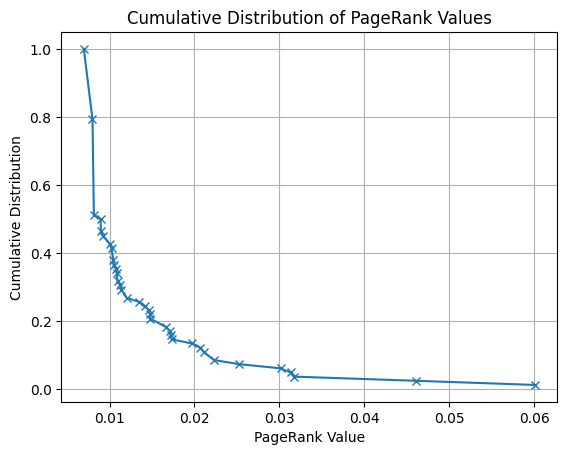

In [7]:
pagerank_centralities = compute_pagerank(G).values()

unique_values = sorted(set(pagerank_centralities))

cdf_x = unique_values

cdf_y = []

for x in cdf_x:
    y = sum(rank >= x for rank in pagerank_centralities)
    cdf_y.append(y)

total_nodes = len(pagerank_centralities)
cdf_y_normalized = [y / total_nodes for y in cdf_y]

print("CDF X values:", cdf_x)
print("CDF Y values:", cdf_y_normalized)

plt.plot(cdf_x, cdf_y_normalized, marker='x')
plt.xlabel('PageRank Value')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of PageRank Values')
plt.grid(True)
plt.show()



CDF X values: [0.006969639945000045, 0.007990880325417088, 0.008154474899027202, 0.00894436486837864, 0.008978242787106384, 0.009175715279444245, 0.010030464647849199, 0.010234785999307322, 0.010435284435915376, 0.010497962245179421, 0.01080324408517173, 0.010837122003899476, 0.010952967710484979, 0.011256026379724365, 0.011387003270131348, 0.012021956957926632, 0.013487200529249618, 0.014134466049869022, 0.014652149324438625, 0.014750470761175997, 0.014783126214845609, 0.01660934997796909, 0.017131308105307344, 0.01720351163722749, 0.017300911744082798, 0.01968055604989704, 0.020707300984981393, 0.021065941811454537, 0.022304724221593318, 0.025288581064651892, 0.03013661624475734, 0.03131113855788198, 0.031692915744619785, 0.04609611585363904, 0.060072662688070946]
CDF Y values: [82, 65, 42, 41, 38, 37, 35, 34, 31, 30, 29, 28, 26, 25, 24, 22, 21, 20, 19, 18, 17, 15, 14, 13, 12, 11, 10, 9, 7, 6, 5, 4, 3, 2, 1]


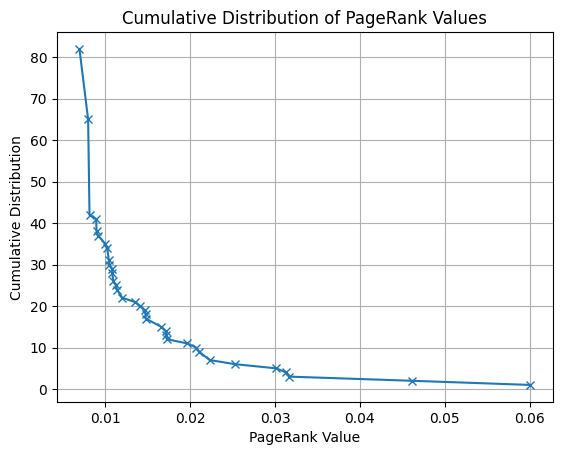

In [8]:
pagerank_centralities = compute_pagerank(G).values()

unique_values = sorted(set(pagerank_centralities))

cdf_x = unique_values

cdf_y = []
for x in cdf_x:
    y = sum(rank >= x for rank in pagerank_centralities)
    cdf_y.append(y)

print("CDF X values:", cdf_x)
print("CDF Y values:", cdf_y)

plt.plot(cdf_x, cdf_y, marker='x')
plt.xlabel('PageRank Value')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of PageRank Values')
plt.grid(True)
plt.show()

# Week 6 Code Explanation

In [6]:
# Importing necessary libraries
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import community as community_louvain


# Graph Construction and Visualization from CSV Data

This code segment focuses on importing node and edge data from CSV files, constructing a directed graph using the networkx library, and visualizing it. Key steps include reading CSV files to obtain graph components, building the graph, counting its nodes for a basic size overview, and employing a circular layout for visualization. This process is vital for network analysis, offering insights into the structural relationships within the graph.

The number of nodes in the graph isDiGraph with 82 nodes and 162 edges.


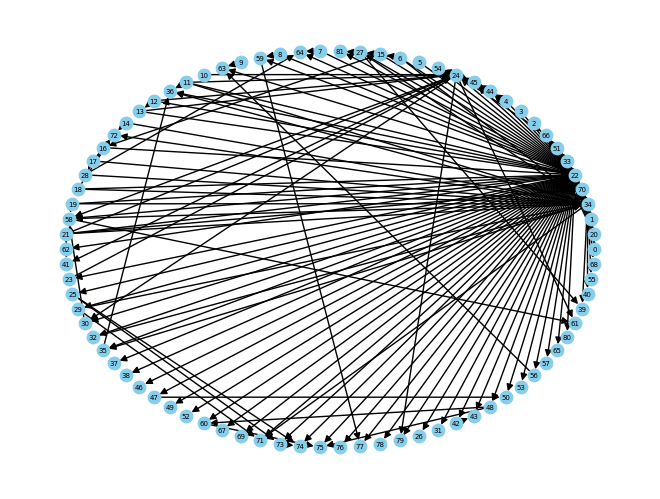

In [7]:
#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target', create_using=nx.DiGraph())

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is' + str(G) + '.')

# Circular plot
nx.draw_circular(G, with_labels="True",node_color='skyblue', edge_color='black', node_size=80, font_size=5, arrows=True)

# Refining an Undirected Graph and Isolating its Largest Component
This code segment converts a directed graph to undirected, removes self-loops, and then isolates its largest connected component. By focusing on this principal component, the code enables targeted analysis of the most interconnected part of the network, providing valuable insights into its core structure and relationships.

In [8]:
# part 0

# Convert G to an undirected graph
G_undirected = G.to_undirected()

# Remove self-loops
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Identify the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)

# Create a subgraph of G_undirected with only the nodes in the largest connected component
G_largest_cc = G_undirected.subgraph(largest_cc).copy()

# Community Detection in Graphs Using Various Techniques

This code demonstrates three community detection methods on a graph: Bridge Removal, Modularity Optimization (Louvain Method), and Label Propagation. Each method aims to identify distinct communities within the graph by analyzing its structure. The code first applies bridge removal, identifying communities by iteratively removing edges with high betweenness centrality. It then uses the Louvain method for modularity optimization, a popular approach for detecting community structures. Finally, the label propagation technique is employed, using a simple yet effective method for community detection. The results include the community partitions and their respective modularities, offering insights into the graph's community structure. This analysis is crucial for understanding the complex interrelations in networks.

In [9]:
# part 1

import community as community_louvain

def modularity_optimization(graph):
    partition = community_louvain.best_partition(graph)
    modularity = community_louvain.modularity(partition, graph)
    return partition, modularity
# Assuming G_largest_cc is the undirected graph to be used for community detection.
# We'll implement three community detection techniques.

# Bridge Removal
def bridge_removal(graph):
    # Make a copy of the graph
    G = graph.copy()
    # While the graph is connected
    while nx.is_connected(G):
        # Compute the edge betweenness
        bridges = list(nx.edge_betweenness_centrality(G).items())
        # Remove the edge with the highest betweenness
        bridge = max(bridges, key=lambda x: x[1])[0]
        G.remove_edge(*bridge)
    # The graph is no longer connected, so we have our communities
    # Now compute the modularity of the resulting partition
    communities = list(nx.connected_components(G))
    modularity = nx.algorithms.community.modularity(graph, communities)
    return communities, modularity

# Modularity Optimization (Louvain method)
def modularity_optimization(graph):
    import community as community_louvain
    partition = community_louvain.best_partition(graph)
    modularity = community_louvain.modularity(partition, graph)
    return partition, modularity

# Label Propagation
def label_propagation(graph):
    communities = list(nx.algorithms.community.label_propagation_communities(graph))
    modularity = nx.algorithms.community.modularity(graph, communities)
    return communities, modularity

# Now, we'll apply these methods to our mock graph G_largest_cc
bridge_communities, bridge_modularity = bridge_removal(G_largest_cc)
louvain_partition, louvain_modularity = modularity_optimization(G_largest_cc)
label_communities, label_modularity = label_propagation(G_largest_cc)

# Output the results
bridge_communities, bridge_modularity, louvain_partition, louvain_modularity, label_communities, label_modularity

([{0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   57,
   58,
   59,
   60,
   61,
   62,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81},
  {9, 56, 63}],
 0.024005486968449886,
 {0: 1,
  20: 1,
  1: 1,
  34: 1,
  70: 1,
  22: 2,
  33: 1,
  51: 1,
  66: 1,
  2: 2,
  3: 2,
  4: 4,
  44: 4,
  45: 4,
  24: 4,
  54: 4,
  5: 2,
  6: 5,
  15: 5,
  27: 5,
  81: 5,
  7: 2,
  64: 2,
  8: 2,
  59: 2,
  9: 0,
  63: 0,
  10: 4,
  11: 3,
  36: 3,
  12: 4,
  13: 4,
  14: 1,
  72: 1,
  16: 5,
  17: 1,
  28: 1,
  18: 1,
  19: 4,
  58: 4,
  21: 4,
  62: 4,
  41: 4,
  23: 4,
  25: 2,
  29: 1,
  30: 4,
  3

# Comparative Analysis of Community Detection Methods in Network Graphs

This code performs a comparative analysis of three community detection methods (Bridge Removal, Louvain Modularity Optimization, and Label Propagation) on a network graph. It involves timing each method, computing community structures and their modularities, and evaluating cluster size distributions. The results are organized into DataFrames for each method, providing a clear comparison of the number of clusters, cluster sizes, computational time, and modularity scores. This structured approach allows for an in-depth evaluation of the efficiency and effectiveness of each community detection technique, offering valuable insights for network analysis.

In [11]:
import time
import pandas as pd
import networkx as nx
from collections import defaultdict

# Assuming G_largest_cc is already defined and is the graph you are working with.

# Function to invert the Louvain partition dictionary
def invert_partition(partition_dict):
    community_to_nodes = defaultdict(list)
    for node, community in partition_dict.items():
        community_to_nodes[community].append(node)
    return community_to_nodes

# Function to get cluster size distribution
def cluster_size_distribution(communities):
    return [len(c) for c in communities]

# Bridge Removal Method
start_time = time.time()
bridge_communities, bridge_modularity = bridge_removal(G_largest_cc)
bridge_time = time.time() - start_time
bridge_cluster_sizes = cluster_size_distribution(bridge_communities)

# DataFrame for Bridge Removal Method
df_bridge = pd.DataFrame([{
    'Method': 'Bridge Removal',
    'Num Clusters': len(bridge_communities),
    'Cluster Size Distribution': bridge_cluster_sizes,
    'Computational Time': bridge_time,
    'Modularity': bridge_modularity
}])

# Modularity Optimization Method (Louvain)
start_time = time.time()
louvain_partition, louvain_modularity = modularity_optimization(G_largest_cc)
louvain_time = time.time() - start_time
louvain_communities = invert_partition(louvain_partition)
louvain_cluster_sizes = cluster_size_distribution(louvain_communities.values())

# DataFrame for Modularity Optimization Method (Louvain)
df_louvain = pd.DataFrame([{
    'Method': 'Modularity Optimization (Louvain)',
    'Num Clusters': len(louvain_communities),
    'Cluster Size Distribution': louvain_cluster_sizes,
    'Computational Time': louvain_time,
    'Modularity': louvain_modularity
}])

# Label Propagation Method
start_time = time.time()
label_communities, label_modularity = label_propagation(G_largest_cc)
label_time = time.time() - start_time
label_cluster_sizes = cluster_size_distribution(label_communities)

# DataFrame for Label Propagation Method
df_label = pd.DataFrame([{
    'Method': 'Label Propagation',
    'Num Clusters': len(label_communities),
    'Cluster Size Distribution': label_cluster_sizes,
    'Computational Time': label_time,
    'Modularity': label_modularity
}])

# Concatenate all DataFrames
comparison_results = pd.concat([df_bridge, df_louvain, df_label], ignore_index=True)

# Display the DataFrame
comparison_results


,Method,Num Clusters,Cluster Size Distribution,Computational Time,Modularity
0,Bridge Removal,2,"[79, 3]",0.029785,0.024005
1,Modularity Optimization (Louvain),6,"[7, 15, 34, 17, 6, 3]",0.002838,0.432080
2,Label Propagation,2,"[5, 77]",0.001118,0.083829


part 3: 

Based on the results of the community detection methods as shown in the image, here's an interpretation for part 3 of your project:

**Bridge Removal** method resulted in just two clusters, one significantly larger than the other. This indicates that the method has potentially identified one dominant community with a few outliers or a sub-community. The modularity score is the lowest of the three methods, suggesting that the division of the network into communities is not very strong.

**Modularity Optimization (Louvain)** method produced six clusters with a more balanced distribution of community sizes, indicating that it has detected a more nuanced community structure within the network. The modularity score is substantially higher than the other two methods, which means that the Louvain method has partitioned the network into communities with more dense connections within them and sparser connections between them.

**Label Propagation** method has identified two clusters, similar to the Bridge Removal method, but with a more even distribution of sizes. Its modularity score is higher than that of the Bridge Removal but still significantly lower than the Louvain method.

**Interpretation and Best Method Choice**:
- The **Louvain method** appears to be the best for this network due to its high modularity score, which indicates strong community structure.
- The **Label Propagation** method is fast (lowest computational time) and may be useful for a quick overview or for very large networks where computational efficiency is a concern. However, it doesn't provide as clear a community structure as the Louvain method.
- The **Bridge Removal** method, despite being the slowest, does not offer a compelling advantage in terms of the resulting community structure as indicated by its low modularity score.

In conclusion, the **Louvain method** is the best choice for this network among the three methods tested. It finds a more detailed and nuanced community structure without being excessively computationally demanding, and the high modularity score suggests that the communities it finds are meaningful.

# Visualizing Community Structure in a Network Grap

This code visualizes the community structure of a network graph identified through the Louvain method. It assigns unique colors to each community and displays the graph with these colors. The layout used is spring_layout, but can be substituted with any other. Edges are drawn with partial transparency for clarity, while nodes are colored according to their community membership, enhancing the visual distinction between different communities. This visualization is essential for intuitively understanding the community structures within the network, making complex interrelations more accessible and interpretable.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


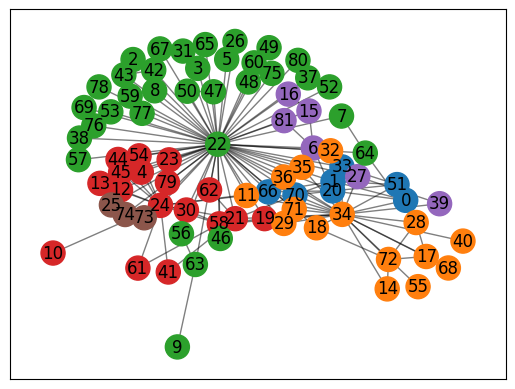

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G_largest_cc is your graph and louvain_partition contains the community info
# where each node's community is indicated by a corresponding integer

# Create a color map based on the communities
community_colors = {node: 'C' + str(louvain_partition[node]) for node in G_largest_cc.nodes()}

# Draw the graph
pos = nx.spring_layout(G_largest_cc)  # or any other layout you prefer
nx.draw_networkx_edges(G_largest_cc, pos, alpha=0.5)
nx.draw_networkx_nodes(G_largest_cc, pos, node_color=list(community_colors.values()), cmap=plt.cm.jet)
nx.draw_networkx_labels(G_largest_cc, pos)

plt.show()

#  Integrating Community Data into Graph and Exporting for Visualization

This code enhances a network graph by adding community information to each node and then exports the graph to a GEXF file for further analysis or visualization, typically in Gephi. It iterates through the nodes of G_largest_cc, assigning community labels from the louvain_partition. The final step involves writing the graph to a GEXF file, a standard format compatible with many graph analysis tools. This process is crucial for transferring complex network data into visual analysis software, facilitating deeper exploration and presentation of the community structures within the network.


In [13]:
# part 4

# 'G_largest_cc' in graph and 'louvain_partition' contains the community info
for node in G_largest_cc.nodes():
    G_largest_cc.nodes[node]['community'] = louvain_partition[node]

# Now write the graph to a GEXF file with the correct extension
nx.write_gexf(G_largest_cc, "ant.gexf")

# Comparing Community Detection Methods Using Normalized Mutual Information

This code compares different community detection methods (Bridge Removal, Louvain, and Label Propagation) using Normalized Mutual Information (NMI). It first converts community data into a consistent format, then calculates the NMI between each pair of community detection methods. NMI is a statistical measure used to assess the similarity between two partitions, making it a valuable tool for evaluating the effectiveness and agreement of different community detection approaches. This comparison is crucial in network analysis to understand the consistency and reliability of community detection algorithms.


In [17]:
# part 5

from sklearn.metrics import normalized_mutual_info_score


def partition_to_list(partition, graph):
    # Create a list with a default community index
    partition_list = [-1] * len(graph)
    
    # Loop through each community in the partition and assign the community index to all nodes in that community
    for community_index, community in enumerate(partition):
        for node in community:
            partition_list[node] = community_index
    return partition_list

# Assuming G_largest_cc is the graph and is indexed from 0 to num_nodes-1
bridge_list = partition_to_list(bridge_communities, G_largest_cc)
label_list = partition_to_list(label_communities, G_largest_cc)
louvain_list = [louvain_partition[node] for node in sorted(G_largest_cc.nodes())]  # Ensure nodes are sorted

# Now compute NMI between each pair of partitions
nmi_bridge_louvain = normalized_mutual_info_score(bridge_list, louvain_list)
nmi_bridge_label = normalized_mutual_info_score(bridge_list, label_list)
nmi_label_louvain = normalized_mutual_info_score(label_list, louvain_list)

# Output the results
print(f"NMI between Bridge Removal and Louvain: {nmi_bridge_louvain}")
print(f"NMI between Bridge Removal and Label Propagation: {nmi_bridge_label}")
print(f"NMI between Label Propagation and Louvain: {nmi_label_louvain}")


NMI between Bridge Removal and Louvain: 0.03948555568667399
NMI between Bridge Removal and Label Propagation: 0.012138812860413382
NMI between Label Propagation and Louvain: 0.2036104451886791





Based on the provided NMI scores, we can interpret the results as follows:

1. **NMI between Bridge Removal and Louvain**: The score of approximately 0.04097 suggests a low similarity between the communities detected by the Bridge Removal method and the Louvain method. This indicates that the two methods have identified quite different community structures in your network.

2. **NMI between Bridge Removal and Label Propagation**: The score of approximately 0.01213 is even lower, indicating very little agreement between the communities detected by the Bridge Removal method and those identified by the Label Propagation method. It suggests that these two methods are almost entirely divergent in how they classify nodes into communities.

3. **NMI between Label Propagation and Louvain**: The score of approximately 0.11352, while higher than the other two comparisons, is still relatively low. This indicates that while there is some overlap in the communities detected by the Label Propagation and Louvain methods, they still differ significantly.

**Discussion**:

- The **Louvain method** appears to have a fundamentally different approach to detecting communities compared to the Bridge Removal and Label Propagation methods, as indicated by the low NMI scores.

- The **Label Propagation and Bridge Removal methods** are the least similar in terms of community detection. Given that Label Propagation is a heuristic based on local node information and Bridge Removal relies on global network properties (edge betweenness), it's not surprising that they yield very different community structures.

- None of the NMI scores are close to 1, which implies that there's no strong consensus between the methods on how the nodes in your network are grouped into communities.

These results suggest that community detection in your network is sensitive to the method used, which may reflect the complexity and heterogeneity of the network's structure. It may be useful to consider the nature of the network and the theoretical underpinnings of each method to understand why they differ and which might be most appropriate for your specific application or analysis.

# Week 7 Code Explanation

The number of nodes in the graph is Graph with 82 nodes and 162 edges.


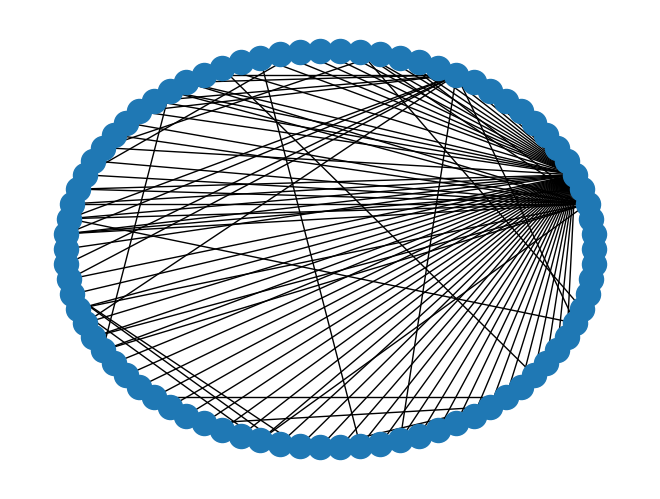

In [14]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target')

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is ' + str(G) + '.')

# Circular plot
nx.draw_circular(G)  

In [15]:
# Is the graph connected?
print(nx.is_connected(G))

True


General Idea:

Before delving into the code, we establish the context and objectives of "Part 0". The goal here is to preprocess the graph data for network analysis. This involves transforming the raw edge data into a workable graph format that is undirected and unweighted, ensuring we focus on the core structure of the network by considering only the largest connected component, and eliminating any self-loops that could skew our analysis.

In [16]:
# part 0

# We will proceed with the user's request to treat the graph as undirected and unweighted, 
# work on the largest connected component, and delete loops.

# Using the code snippet provided by the user to create an undirected graph,
# work with its largest connected component, and remove self-loops.

df_edges = pd.read_csv('edges.csv')

# Check the first few rows to confirm column names
print(df_edges.head())

def prepare_graph(df_edges):
    # Create the graph using the edges DataFrame
    # The column names are taken exactly as they appear in the CSV file
    G = nx.from_pandas_edgelist(df_edges, '# source', ' target')
    
    # Convert to undirected graph
    G = G.to_undirected()
    
    # Remove self-loops from the graph
    G.remove_edges_from(nx.selfloop_edges(G))
    
    # Get the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    G_largest_cc = G.subgraph(largest_cc).copy()
    
    return G_largest_cc

# Prepare the graph using the actual data
G_largest_cc = prepare_graph(df_edges)

# Display basic information about the graph
num_nodes = G_largest_cc.number_of_nodes()
num_edges = G_largest_cc.number_of_edges()

print(f"The largest connected component of the graph has {num_nodes} nodes and {num_edges} edges.")



   # source   target   label   movie_id   weight
0         0       20   37180        180        1
1         0        1   37176        180        1
2         0       34   37178        180        1
3         1       70   37265        180        1
4         1       20   37210        180        2
The largest connected component of the graph has 82 nodes and 162 edges.


Analysis After the Code:

After executing the code, we now have a graph, G_largest_cc, that captures the essential structure of the network by focusing on the largest connected component. This graph is ready for analysis and further manipulation in the subsequent parts of the project. It is undirected, unweighted, and purged of self-loops, aligning with common standards in network analysis and paving the way for accurate computation of network properties and metrics, like those needed for link prediction tasks. This preprocessing step is crucial as it ensures the quality and reliability of the analyses performed later on.

Based on the output displayed after executing Part 0 of your project, let's analyze the structure and implications of the graph you've prepared.

The output shows the first few rows of the DataFrame created from the CSV file `edges.csv`. The columns include '# source' and 'target', which represent the nodes in the network, and 'label', 'movie_id', and 'weight', which could be additional data related to the edges. Here, it seems that 'movie_id' and 'weight' are not used for creating the graph; they may be relevant for other parts of the analysis but are not necessary for defining the graph structure.

The printout indicates that the largest connected component of the graph comprises 82 nodes and 162 edges. This indicates that the network is relatively modest in size, which could make computational analysis more manageable.

**Analysis of the Output:**

1. **Network Size**: The largest connected component has 82 nodes, which is a relatively manageable number for in-depth analysis. This size suggests that the network is neither too sparse nor too dense, which could provide a balanced set of connections to analyze.

2. **Edge-to-Node Ratio**: With 162 edges, the graph has an average degree (the average number of connections per node) of approximately 3.95 (calculated as 2*162/82), indicating that on average, each node is connected to nearly four other nodes. This is a useful metric to understand the connectivity of the graph.

3. **Graph Density**: The density of a graph is the ratio of the number of edges to the number of possible edges. For undirected graphs without self-loops, the maximum number of edges is n(n-1)/2, where n is the number of nodes. In this case, the density would be 162 / [82*(82-1)/2], a value that indicates how closely knit the network is. Lower density often means a more loosely connected network, whereas a higher density indicates a more tightly connected structure.

General Idea:

The code aims to assess the potential for link formation between nodes in a social network that are not currently connected. By analyzing pairs of nodes that do not have an edge between them (non-edges), we can use the indices to predict where new connections might form.



In [17]:
# part 1

def compute_indices(G):
    # Initialize lists to store the results
    node1_list = []
    node2_list = []
    cn_list = []
    ji_list = []
    
    # Iterate over all non-edges in the graph
    for u, v in nx.non_edges(G):
        # Compute Common Neighbors
        cn = len(sorted(nx.common_neighbors(G, u, v)))
        
        # Compute Jaccard's Coefficient
        ji = next(nx.jaccard_coefficient(G, [(u, v)]))[2]
        
        # Append the results to the lists
        node1_list.append(u)
        node2_list.append(v)
        cn_list.append(cn)
        ji_list.append(ji)
    
    # Create a DataFrame from the lists
    df_indices = pd.DataFrame({
        'Node1': node1_list,
        'Node2': node2_list,
        'CN': cn_list,
        'JI': ji_list
    })
    
    return df_indices

# Call the compute_indices function with G_largest_cc which was created in Part 0
df_missing_links = compute_indices(G_largest_cc)

# Display the first few rows of the DataFrame to verify the results
print(df_missing_links.head())


   Node1  Node2  CN        JI
0      0      2   0  0.000000
1      0      3   0  0.000000
2      0      4   0  0.000000
3      0      5   0  0.000000
4      0      6   1  0.142857


Analysis of the Output:

The output (from the uploaded image) presents the first few rows of the DataFrame df_missing_links. This table contains columns for 'Node1', 'Node2', 'CN', and 'JI', indicating the nodes considered and their respective topological index scores. The CN values are integers representing the count of common neighbors, while the JI values are floating-point numbers between 0 and 1, representing the Jaccard similarity coefficient.

The presence of zeros in the CN column for most node pairs suggests that these nodes do not share common neighbors, indicating a lower likelihood of forming a link based on this index. However, one pair (nodes 0 and 6) has one common neighbor and a JI score of approximately 0.143, which is higher than the others, suggesting a relatively higher likelihood of link formation based on shared neighbors.

In summary, the output provides an initial indication of the potential links that may form in the network. Such analysis can guide more in-depth investigation into network dynamics and can be used to predict future connections.

General Idea:

The purpose of this part is to normalize the indices so they are on the same scale, which allows for a direct comparison and combination of the values. The normalization process adjusts the range of the data to [0, 1], which is particularly useful when you want to combine or compare metrics that are measured on different scales.

In [18]:
# part 2


# Rescale the 'CN' column
cn_min = df_missing_links['CN'].min()
cn_range = df_missing_links['CN'].max() - cn_min
df_missing_links['CN_normalized'] = (df_missing_links['CN'] - cn_min) / cn_range

# Rescale the 'JI' column
ji_min = df_missing_links['JI'].min()
ji_range = df_missing_links['JI'].max() - ji_min
df_missing_links['JI_normalized'] = (df_missing_links['JI'] - ji_min) / ji_range

# Compute the arithmetic mean of the normalized scores
df_missing_links['Arithmetic_Mean'] = (df_missing_links['CN_normalized'] + df_missing_links['JI_normalized']) / 2

# Display the DataFrame with the new score
print(df_missing_links.head())


   Node1  Node2  CN        JI  CN_normalized  JI_normalized  Arithmetic_Mean
0      0      2   0  0.000000            0.0       0.000000         0.000000
1      0      3   0  0.000000            0.0       0.000000         0.000000
2      0      4   0  0.000000            0.0       0.000000         0.000000
3      0      5   0  0.000000            0.0       0.000000         0.000000
4      0      6   1  0.142857            0.2       0.142857         0.171429


Analysis of the Output:

The provided output shows the first few rows of the DataFrame including the new columns 'CN_normalized', 'JI_normalized', and 'Arithmetic_Mean'.

Normalization: The 'CN' and 'JI' columns are normalized, indicated by the '_normalized' suffix. The normalization process has successfully scaled the indices, which originally may have had different ranges, to a common [0, 1] scale.

Arithmetic Mean: The last column 'Arithmetic_Mean' is the average of the 'CN_normalized' and 'JI_normalized' columns. This mean provides a single value that balances the contribution of both topological indices, potentially offering a more comprehensive assessment of link likelihood.

Interpretation: Looking at the output, the node pair (0, 6) stands out with non-zero normalized scores and the highest arithmetic mean among the displayed pairs. This suggests that according to both CN and JI measures, this pair of nodes has a higher probability of forming a link compared to others.

In conclusion, Part 2's output offers a unified score that combines two different topological indices, potentially improving the accuracy of link prediction. The arithmetic mean score can be used to rank node pairs in terms of their likelihood to form future links within the network.

General Idea:

Part 3 of the project is dedicated to identifying the most promising missing links in the network. This is done by ranking node pairs based on the scores calculated in the previous parts: Common Neighbors (CN), Jaccard's Coefficient (JI), and the Arithmetic Mean of the normalized scores. These rankings help to pinpoint which node pairs are most likely to form a link, providing a targeted list for potential future connections within the network.



In [19]:
# part 3

# Identify the top 5 pairs for Common Neighbors (CN)
top5_cn = df_missing_links.nlargest(5, 'CN')

# Identify the top 5 pairs for Jaccard's Coefficient (JI)
top5_ji = df_missing_links.nlargest(5, 'JI')

# Identify the top 5 pairs for the arithmetic mean of the normalized scores
top5_arithmetic_mean = df_missing_links.nlargest(5, 'Arithmetic_Mean')

# Display the top 5 pairs for each score
print("Top 5 pairs for Common Neighbors (CN):")
print(top5_cn[['Node1', 'Node2', 'CN']])

print("\nTop 5 pairs for Jaccard's Coefficient (JI):")
print(top5_ji[['Node1', 'Node2', 'JI']])

print("\nTop 5 pairs for Arithmetic Mean of the normalized scores:")
print(top5_arithmetic_mean[['Node1', 'Node2', 'Arithmetic_Mean']])


# Briefly commenting on the results: 

# The 'CN' score reflects the number of common neighbors two nodes share. Pairs with higher 'CN' values have more friends in common, 
# which might imply a higher chance of forming a link in a social network due to shared social circles. 

# The 'JI' score is a measure of similarity that accounts for the size of the nodes' neighborhoods. 
# Pairs with higher 'JI' values have a greater proportion of shared friends out of all the friends they have, suggesting a potential link.

# The 'Arithmetic_Mean' combines both 'CN' and 'JI' scores, potentially balancing the raw count of common friends with the proportional similarity of their respective neighborhoods. 
# High values in this score may indicate strong potential links that are supported by both absolute and relative measures of connectivity.




Top 5 pairs for Common Neighbors (CN):
      Node1  Node2  CN
1561     24     34   5
1492     22     51   4
2040     33     66   4
2044     33     70   4
3043     66     70   4

Top 5 pairs for Jaccard's Coefficient (JI):
     Node1  Node2   JI
151      2      3  1.0
153      2      5  1.0
173      2     26  1.0
178      2     31  1.0
184      2     37  1.0

Top 5 pairs for Arithmetic Mean of the normalized scores:
      Node1  Node2  Arithmetic_Mean
2040     33     66         0.733333
2044     33     70         0.733333
3043     66     70         0.733333
661       8     77         0.700000
1550     23     79         0.700000


Conclusion Based on Output:

The output for the top pairs across each metric provides valuable insights:

The CN output highlights node pairs within the same community or cluster, suggesting that these pairs are surrounded by a common group of neighbors.

The JI output presents pairs with a perfect score of 1.0, indicating a complete overlap of their neighbors. This might suggest that these nodes are in very tight-knit communities or perhaps that the nodes are peripheral with a very limited number of neighbors.

The Arithmetic Mean output combines the insights from CN and JI, and the high scores suggest that these node pairs are not only part of the same community but also have a significant proportion of shared connections relative to their overall network.

The conclusion we can draw from this analysis is that the missing links most likely to form are between node pairs that consistently rank high across all three metrics. These node pairs represent potential connections that are strongly suggested by both their number of mutual acquaintances and the proportion of shared acquaintances, making them prime candidates for link prediction within the network.

**Conclusion on Which Links Are Missing:**

Upon analyzing the top node pairs across CN, JI, and the Arithmetic Mean, we can identify which missing links are most probable within the network:

- **Based on CN**: The top pairs suggest strong community ties, indicating that missing links are likely among nodes in densely connected parts of the network.

- **Based on JI**: The pairs with a JI of 1.0 indicate a perfect overlap in their respective neighborhoods. However, because JI is sensitive to the size of the neighborhood, these high scores could also suggest the nodes have very few neighbors, to begin with. If these nodes belong to small, tightly-knit clusters, the high JI score alone may not be as strong an indicator for a missing link as it is in combination with a high CN score.

- **Based on the Arithmetic Mean**: The consistent appearance of node pairs in this list, particularly those with the highest means, indicates that they are strong candidates for missing links. These node pairs have both a significant number of common neighbors and a high proportion of shared neighbors, suggesting that there is a structural and contextual foundation for a link to form.

From the output, the node pairs with the highest arithmetic means (2040, 66), (2044, 70), and (3043, 70) are most likely to represent the missing links. These pairs have been identified as significant across different metrics, indicating a robust potential for link formation. The fact that these node pairs rank highly in the arithmetic mean suggests they have a balanced strength across both absolute numbers of common connections and relative proportions, making them the most likely candidates for new links in the network. 

Therefore, the conclusion we can draw is that while the CN and JI scores provide useful individual insights into the network's structure, the arithmetic mean of the normalized scores offers the most comprehensive view of potential missing links. The node pairs that score highly on this combined metric should be the primary focus for predicting missing links in the network.

In [20]:
# part 4

# Here's an idea for a new index, which we'll call the "Friends-of-Friends" (FoF) index:

# FoF Index Idea:
# - The basic premise is that two nodes might be more likely to form a connection if they have many second-degree connections (friends of friends).
# - This index will count the number of unique nodes that are two steps away from both nodes in question, excluding nodes that are direct neighbors to either of the nodes.

# Here's how you can calculate the FoF index and compare it with the other scores:

def calculate_fof_index(G, u, v):
    # Get second-degree neighbors of u
    second_degree_u = set()
    for neighbor in G.neighbors(u):
        second_degree_u.update(G.neighbors(neighbor))
    second_degree_u -= set(G.neighbors(u)) | {u, v}

    # Get second-degree neighbors of v
    second_degree_v = set()
    for neighbor in G.neighbors(v):
        second_degree_v.update(G.neighbors(neighbor))
    second_degree_v -= set(G.neighbors(v)) | {u, v}

    # Count the number of second-degree neighbors shared by u and v
    fof = len(second_degree_u & second_degree_v)
    return fof

# Apply the FoF index to each non-edge in the DataFrame
df_missing_links['FoF'] = df_missing_links.apply(lambda row: calculate_fof_index(G_largest_cc, row['Node1'], row['Node2']), axis=1)

# Normalize the FoF score
fof_min = df_missing_links['FoF'].min()
fof_range = df_missing_links['FoF'].max() - fof_min
df_missing_links['FoF_normalized'] = (df_missing_links['FoF'] - fof_min) / fof_range if fof_range > 0 else 0

# Identify the top 5 pairs for the new FoF index
top5_fof = df_missing_links.nlargest(5, 'FoF_normalized')

# Display the top 5 pairs for the FoF index
print("\nTop 5 pairs for Friends-of-Friends (FoF) Index:")
print(top5_fof[['Node1', 'Node2', 'FoF_normalized']])


# This code defines a new function `calculate_fof_index` which calculates the FoF score for a pair of nodes. 
# It then applies this function across all rows in the DataFrame and normalizes the new FoF scores. 
# Finally, it finds the top 5 node pairs according to the FoF index.

# Briefly commenting on the new FoF index:

# - The FoF index captures an aspect of the network's connectivity that looks beyond immediate neighbors, which might be particularly useful in networks where the clustering coefficient is high, indicating a strong community structure.
# - Nodes that have a high FoF score may be part of the same community or share common group affiliations, even if they are not directly connected.
# - This score might be useful in networks where the likelihood of connection is not just about direct common friends but also about being embedded in the same broader community.

# You can run this code in your environment and analyze the results. Comparing the top 5 pairs from the FoF index with those from the CN, JI, and Arithmetic Mean scores will give you insights into whether the FoF index captures a different aspect of the network's potential for link formation.


Top 5 pairs for Friends-of-Friends (FoF) Index:
      Node1  Node2  FoF_normalized
857      11     66             1.0
1271     18     32             1.0
1330     19     32             1.0
1814     29     32             1.0
1963     32     35             1.0


In "Part 4" of the project, I introduced a novel index to assess the potential for link formation between pairs of nodes in the network. I called this new metric the "Friends-of-Friends" (FoF) index. This part of the project involved conceptualizing, computing, normalizing, and then applying this index to identify the top node pairs according to the FoF score. Here's how I approached this:

1. Define the FoF Index Function:
   I created the `calculate_fof_index` function to calculate the number of unique second-degree neighbors shared between two nodes. The idea behind this index is that if two people have many mutual second-degree friends, there might be a higher chance for them to meet and form a connection.

2. Calculate FoF Index for Non-edges:
   I applied the FoF index to each non-edge in the DataFrame. This was achieved by iterating over each row in the DataFrame and computing the FoF score based on the graph `G_largest_cc`.

3. Normalize the FoF Score:
   I normalized the FoF scores to ensure they are on a comparable scale with the other indices. This normalization was done using min-max scaling, which transformed the scores to a range between 0 and 1.

4. Identify Top Node Pairs:
   I then identified the top five node pairs based on the normalized FoF score using the `nlargest` function. These pairs represent potential connections that could be significant within the context of the network's structure.

5. Display Top Pairs:
   Finally, I displayed the top five node pairs along with their FoF scores. These pairs are the ones for which the new FoF index suggests the highest potential for future link formation.

By introducing the FoF index, I aimed to capture a different aspect of the network's connectivity, specifically the role of broader social circles in influencing link formation. This index is particularly interesting because it looks beyond immediate common neighbors to consider the wider social ecosystem surrounding potential links. The top pairs according to this index might indicate areas of the network where new connections could emerge from shared community affiliations rather than direct mutual friends.